---
<center><h1> Lesson 4 - Intro to machine learning with scikit-learn</h1></center> 
<center><h1>Part 1. Machine learning general overview. Regression</h1></center>

---

## <u>What is machine learning?</u>

Machine learning (ML) is a method of data analysis that automates analytical model building. Using algorithms that iteratively learn from data, ML allows computers to find hidden insights without being explicitly programmed where to look.

The iterative aspect of ML is important because as models are exposed to new data, they are able to independently adapt. They learn from previous computations to produce reliable, repeatable decisions and results. So in general, ML is about learning to do better in the future based on what was experienced in the past.

ML is a core subarea of artificial intelligence and also intersects broadly with other fields, especially statistics, but also mathematics, physics, theoretical computer science and more.

There are many examples of ML problems:

* optical character recognition: categorize images of handwritten characters by the letters represented
* face detection: find faces in images (or indicate if a face is present)
* spam filtering: identify email messages as spam or non-spam
* topic spotting: categorize news articles (say) as to whether they are about politics, ports, entertainment, etc.
* spoken language understanding: within the context of a limited domain, determine the meaning of something uttered by a speaker to the extent that it can be classified into one of a fixed set of categories
* medical diagnosis: diagnose a patient as a sufferer or non-sufferer of some disease
* customer segmentation: predict, for instance, which customers will respond to a particular promotion
* fraud detection: identify credit card transactions (for instance) which may be fraudulent in nature
* weather prediction: predict, for instance, whether or not it will rain tomorrow


## <u>What are the two main categories of machine learning?</u>

### Supervised learning:
The data comes with additional attributes (called labels) that we want to predict. This problem can be either:

* _**classification**_: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

* _**regression**_: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

### Unsupervised learning: 

The training data consists of a set of input vectors without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.


## <u>How does machine learning "work"?</u>

<img src="images/ml.png">

## Machine learning with scikit-learn

The specific software package we will be using to do ML is called [scikit-learn](http://scikit-learn.org). Scikit-learn is a very powerful package that supports a vast array of ML algorithms (regression, classification, clustering, model selection and dimensionality reduction).

In the current lesson we will consider only supervised ML. Remind, it is broken down into two categories, _classification_ and _regression_. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories (classes). On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

scikit-learn comes with several toy datasets that are quite useful for getting an intuition for ML (iris, digits, diabetes etc.). All available datasets may be found [here](http://scikit-learn.org/stable/datasets). In this lesson we will consider two datasets - Boston and Iris - and apply regression and classification algorithms to them.

 <h2>Regression with Boston dataset</h2>

We chose Boston Housing dataset, which contains information about the housing values in suburbs of Boston.

In [1]:
# Import all datasets
from sklearn.datasets import *

# Load Boston Housind data
data_boston = load_boston()
# Get keys of data
data_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [2]:
# Look at the feature names of Boston data set
print (data_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# For getting more information about this data we can see the description
print (data_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Look at dataset values
data_boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

The Boston dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `data` key, which is a `n_samples x n_features` array. In the case of supervised problem like this one, one or more response variables (labels) are stored in the `target` key.

For better visualization of the features and target examples we use pandas package, that allow to show data as a DataFrame.

In [7]:
import pandas as pd

# Create data frame with the features
boston = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)

# Show a head of the Data Frame
print ("Boston dataset contains {} rows.".format(boston.index.size))
boston.head()

Boston dataset contains 506 rows.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Boston's target contains the housing prices. Let's add column with it.

In [8]:
data_boston.target[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [9]:
# Add column "Price"
boston["PRICE"] = data_boston.target

# Display first 3 rows
boston[:3]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


We must use the features and target for fitting our model. 

Let's put `X` equals to all the other features (or independent variables) and `Y` equals to boston housing price(target).

In [10]:
# Define target
Y = boston.PRICE

# Drop prices from the Data Frame and define features X
X = boston.drop("PRICE", axis = 1)

Let's look at the price of houses in 1000 $.

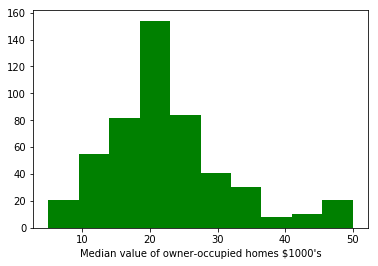

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Y, color = 'g')
plt.xlabel("Median value of owner-occupied homes $1000's")
plt.show()

## <span style="color: blue">Linear regression</span>

The predicting the Boston housing prices is a Regression problem. So, we have chosen the [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) provided by scikit-learn.

Linear regression is the oldest and most widely used predictive model in the field of ML. The goal is to  minimize the sum of the squared errors to fit a straight line to a set of data points - sum of green distances between blue (train) points and red straight line (line of linear regression) on the picture below (note, we have shown only a few such distances): 

<img src="images/linear_regression.png" width="50%">

You can find further information at [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression).

The linear regression model fits a linear function to a set of data points. The form of the function is:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + … + \beta_nX_n$$
or 
$$Y = \beta_0 + \sum_{i=1}^{n}\beta_i X_i,$$

where $Y$ is the target variable and $X_1, X_2, ..., X_n$ are the predictor variables and $\beta_1, \beta_2, ..., \beta_n$ are the regression coefficients (also known as weights), $\beta_0$ is constant. 

The regression calculation can be displayed in a matrix form:  

$$
\begin{equation}
X = 
        \begin{pmatrix}
        x_{10} = 1 & x_{11} & \dots & x_{1k}  \\
        \vdots & \vdots & \ddots & \vdots \\
        x_{n0} = 1 & x_{n1} & \dots & x_{nk}  \\
        \end{pmatrix} \qquad
y = 
        \begin{pmatrix}
        y_{1}  \\
        \vdots \\
        y_{n}  \\
        \end{pmatrix} \qquad
\beta = 
        \begin{pmatrix}
        \beta_{0}  \\
        \beta_{1}  \\
        \vdots \\
        \beta_{k}  \\
        \end{pmatrix}
\end{equation}
$$

Size of $X$ matrix is `n × (k + 1).`

Weights are the solution of the equation system:

$$\sum_{k=1}^{N}\left(Y_k - \beta_0 + \beta_1X_{1k} + \beta_2X_{2k} + … + \beta_nX_{nk}\right)^2 \rightarrow \min$$
or
$$\frac{\partial}{\partial X_i}\sum_{k=1}^{N}\left(\bar Y_k - \beta_0 + \sum_{i=1}^{n}\beta_i \bar X_{ik}\right)^2 = 0,$$
or in the vector form
$$
||y - X \beta|| ^2_2 \longrightarrow \min_{\beta} 
$$

where $\bar{Y}_k$ and $\bar{X}_{ik}$ are real (train) values of target variable and predictors respectivelly and $||...||_2$ denotes the well-known l2-norm.

To solve this problem we need to calculate $\hat\beta$. $\hat\beta$ is expressed analytically from the previous equation and this is the exact solution:  

$$
\hat\beta = {(X^TX)}^{-1}X^Ty
$$ 

Also, $\hat y$ can be calculated, that is, you can calculate the prediction of the model on the objects on which it is trained:  
$$
\hat{y} = X{(X^TX)}^{-1}X^Ty
$$

But for this calculation, you need to transpose matrix of size `n × (k + 1).` This calculation has the complexity $О(n^3)$. For big data sets, it takes too much time.   

So for big data set it is better to use scikit-Learn module [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor).  

SGDRegressor makes not an exact calculation but it is well suited for regression problems with a large number of training samples. This module performs faster calculations, but the accuracy decreases.

First, we will import linear regression from scikit-Learn module and than store this object in a variable `lr`.

In [12]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression contains many parameters, such as:

* `fit(X, y)` - fit linear model   
* `get_params()` - get parameters for this estimator    
* `predict(X)` - predict using the linear model    
* `score(X, y)` - returns the coefficient of determination $R^2$ of the prediction
(note, these parameters are common for the most of algorithms in scikit-learn)
    
This are a parameters and attributes of Ordinary least squares Linear Regression

+ `fit_intercept` : boolean, optional, default True
    
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

+ `normalize` : boolean, optional, default False

This parameter is ignored when `fit_intercept` is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use `sklearn.preprocessing.StandardScaler` before calling `fit` on an estimator with `normalize=False`.

+ `copy_X` : boolean, optional, default True

If True, X will be copied; else, it may be overwritten.

+ `n_jobs` : int, optional, default 1

The number of jobs to use for the computation. If -1 all CPUs are used. This will only provide speedup for n_targets > 1 and sufficient large problems.
	
+ `coef_` : array, shape (n_features, ) or (n_targets, n_features)

Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

+ `intercept_` : array

Independent term in the linear model.

### 1. Fitting a linear model

In [13]:
# Fit Linear Regression
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Show intercept and number of coefficients

print ("Intercept coefficient:",  lr.intercept_)
print ("Number of coefficients:",  len(lr.coef_))

Intercept coefficient: 36.45948838508978
Number of coefficients: 13


So, it means, that for each feature we have found one coefficient. Let's see

In [16]:
pd.DataFrame(list(zip(X.columns, lr.coef_)), columns = ["features", "coefficients"]).sort_values('coefficients', ascending=False)

,features,coefficients
5,RM,3.809865
3,CHAS,2.686734
8,RAD,0.306049
1,ZN,0.046420
2,INDUS,0.020559
11,B,0.009312
6,AGE,0.000692
9,TAX,-0.012335
0,CRIM,-0.108011
12,LSTAT,-0.524758


There is a high correlation between prices & RM (that means average numbers of rooms per dwelling), prices and NOX (nitric oxides concentration).

Lets calculate correlation without machine learning modules. To simplify calculation lets do regression for one variable. It is called **Simple linear regression**.

The least squares method minimizes the sum of the squares of the regression residuals:  

$$
(b_0, b_1) = \arg \min_{\beta_0, \beta_1} F(\beta_0, \beta_1) = \arg \min_{\beta_0, \beta_1} \sum_i{(y_i - \beta_0 - \beta_1 x_i)^2}
$$

Differentiating $F (\beta_0, \beta_1)$ and leveling the partial derivatives to zero, it is easy to obtain point estimates of the model parameters:  

$$
b_1 = \frac { \sum(X_i - \bar X) (Y_i - \bar Y)} {\sum(X_i - \bar X)^2}
$$

$$
b_0 = \bar Y - b_1 \bar X
$$

In [17]:
# calculate regression between housing prices & nitric oxides concentration(NOX)
import numpy as np

X_mean = np.mean(X.NOX)
Y_mean = np.mean(Y)
b1 = np.sum((X.NOX - X_mean) * (Y - Y_mean)) / np.sum((X.NOX - X_mean) ** 2)
b0 = Y_mean - b1 * X_mean
print('b1: ', b1)
print('b0: ', b0)

b1:  -33.91605500866111
b0:  41.34587446797325


And repeat above code for the case of of 1D regression

In [19]:
lr1d = LinearRegression()
lr1d.fit(X.NOX.values.reshape(-1, 1), Y)

print ("b0:",  lr1d.intercept_)
print ("b1:",  lr1d.coef_[0])

b0: 41.345874467973246
b1: -33.916055008661104


As you can see both cases gave the same linear regression coefficients values.

But $b_1$ parameter in this calculation is much higher than in Linear Regression. That is because we try to explaine price only by one parameter and don't use another.  

When we add more parameters, then the model shows more degrees of freedom to manipulate the data. And each parameters has lower weight. 

Lets plot a scatter plot between housing prices and RM and NOX.

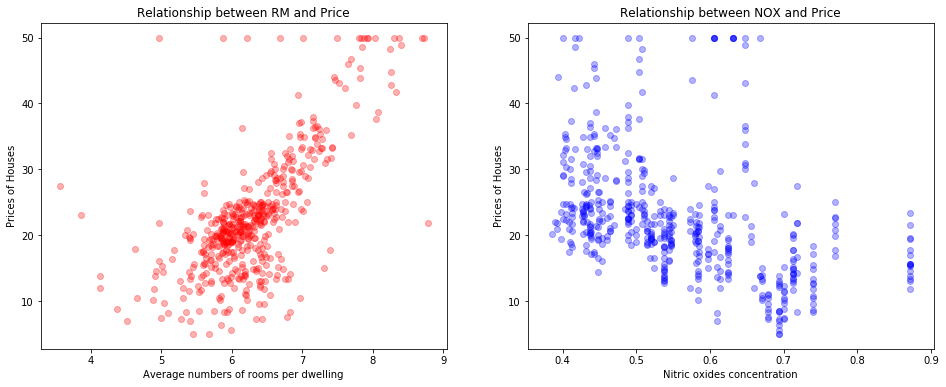

In [20]:
# Import matplotlib library
%matplotlib inline
import matplotlib.pyplot as plt

# Set plot's width and height
plt.rcParams['figure.figsize'] = (16.0, 6.0)

# Plot for RM distribution
plt.subplot(1,2,1)
# Name the axis
plt.xlabel("Average numbers of rooms per dwelling")
plt.ylabel("Prices of Houses")
# Define title
plt.title("Relationship between RM and Price")
# Plot
plt.scatter(boston.RM, boston.PRICE, color = 'r', alpha = 0.3)

# Plot for NOX distribution
plt.subplot(1,2,2)
plt.xlabel("Nitric oxides concentration")
plt.ylabel("Prices of Houses")
plt.title("Relationship between NOX and Price")
plt.scatter(boston.NOX, boston.PRICE, color='b', alpha = 0.3)

plt.show()

There is a positive correlation between RM and housing prices and negative - between NOX and prices.

### 2. Predicting prices

To predict prices we will use `lr.predict()` function.

In [21]:
# Predict the prices
Y_p = lr.predict(X)

# Print the prices of the first 15 houses
print (Y_p[:15])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205]


Let's now plot a difference between the true prices and the predicted prices.

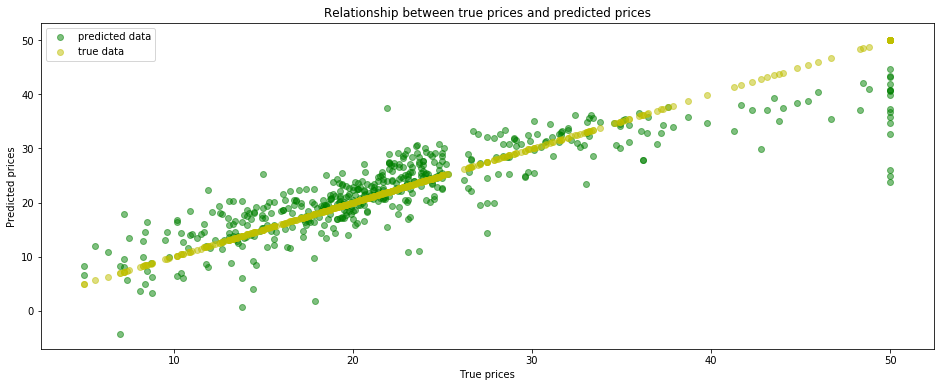

In [22]:
plt.xlabel("True prices")
plt.ylabel("Predicted prices")

plt.title("Relationship between true prices and predicted prices")

plt.scatter(Y, Y_p, color='g', label='predicted data', alpha=0.5)
plt.scatter(Y, Y, color='y', label='true data', alpha=0.5)
plt.legend()
plt.show()

There are some errors. Let's calculate the Mean Squared Error.

In [23]:
# Calculate MSE
mse = np.mean((Y - Y_p)**2)
mse

21.894831181729202

### 3. Training and test data sets

This code will tell us how well the model does on explaining the data we used to fit the model.

In Machine learning we focus on model performance on unseen data. In order to estimate the performance of the system on unseen data, we can split the data into two sets: the training set and the test set.

The following code will fit a model just using the training data and print out the coefficient of determination for both the training and testing data

In [25]:
# Import function for splitting arrays or matrices into random subsets for train and test
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y)

# Show the size of each set 
print ("X.shape", X.shape)
print ("Y.shape", Y.shape)
print ("X_train.shape", X_train.shape)
print ("X_test.shape", X_test.shape)
print ("y_train.shape", y_train.shape)
print ("y_test.shape", y_test.shape)

X.shape (506, 13)
Y.shape (506,)
X_train.shape (379, 13)
X_test.shape (127, 13)
y_train.shape (379,)
y_test.shape (127,)


Build a linear regression model using train and test data sets.

In [26]:
# Fit the model
lr_new = LinearRegression()
lr_new.fit(X_train, y_train)

# Get train prediction
pred_train = lr_new.predict(X_train)

# Get test prediction
pred_test = lr_new.predict(X_test)

As in previous paragraph let's calculate MSE for train and test prediction

In [27]:
print ("Train MSE:", np.mean((y_train - pred_train)**2))
print ("Test MSE:", np.mean((y_test - pred_test)**2))

Train MSE: 20.53028101457743
Test MSE: 27.390166997234203


Let's show the residual plot using training (blue) and test (red) data.

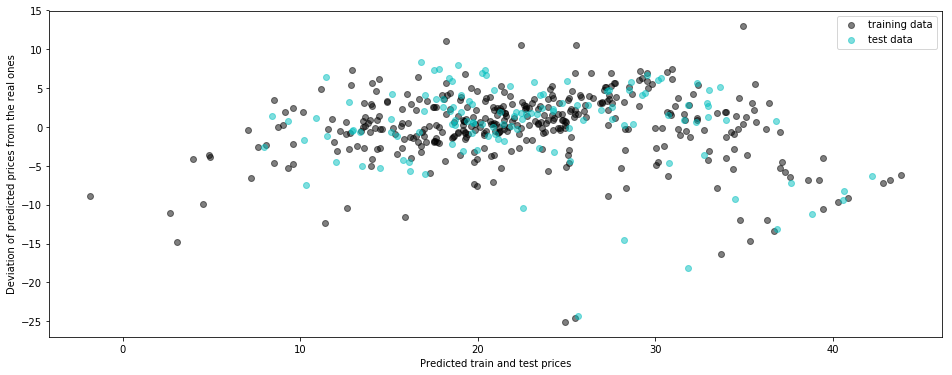

In [28]:
plt.xlabel("Predicted train and test prices")
plt.ylabel("Deviation of predicted prices from the real ones")

plt.scatter(pred_train, pred_train-y_train, color = 'k', label="training data", alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, color = 'c', label="test data", alpha=0.5)

plt.legend()
plt.show()

<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>